In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/Dataset_e-shop_clothing.txt',delimiter=";")
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [3]:
df.shape

(165474, 14)

In [4]:
#Checking For Null Values
df.isnull().sum()

,0
year,0
month,0
day,0
order,0
country,0
session ID,0
page 1 (main category),0
page 2 (clothing model),0
colour,0
location,0


In [5]:
#Drop Duplicates
df.drop_duplicates(inplace=True)
df.shape

(165474, 14)

In [6]:
df.drop(['year','month','day'],axis=1,inplace=True)

In [7]:
#Modifying Column Name
df.rename(columns={"page 1 (main category)": "Product_Category","page 2 (clothing model)": "Clothing_Model",
                   "session ID": "Session_ID","model photography": "Model_photography","price 2": "Price_ab_avg","location":"Pic_location"}, inplace=True)


In [8]:
df.head()

,order,country,Session_ID,Product_Category,Clothing_Model,colour,Pic_location,Model_photography,price,Price_ab_avg,page
0,1,29,1,1,A13,1,5,1,28,2,1
1,2,29,1,1,A16,1,6,1,33,2,1
2,3,29,1,2,B4,10,2,1,52,1,1
3,4,29,1,2,B17,6,6,2,38,2,1
4,5,29,1,2,B8,4,3,2,52,1,1


#Analysing Features
#What Kind of Clothing is Sold


<Axes: ylabel='Product_Category'>

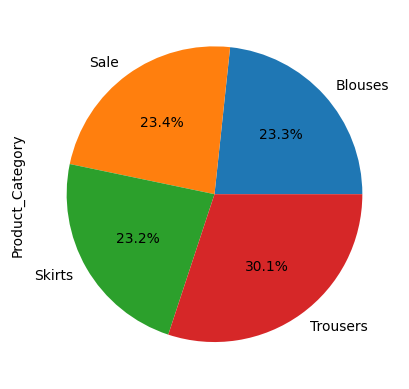

In [9]:
df1=df.copy()
replacement_mapping = {
    1: "Trousers",
    2: "Skirts",
    3: "Blouses",
    4: "Sale"
}
df1['Product_Category'] = df1['Product_Category'].replace(replacement_mapping)
df1.groupby('Product_Category')['Product_Category'].count().plot(kind='pie', autopct='%1.1f%%')

#Clothing Model

<Axes: xlabel='Clothing_Model'>

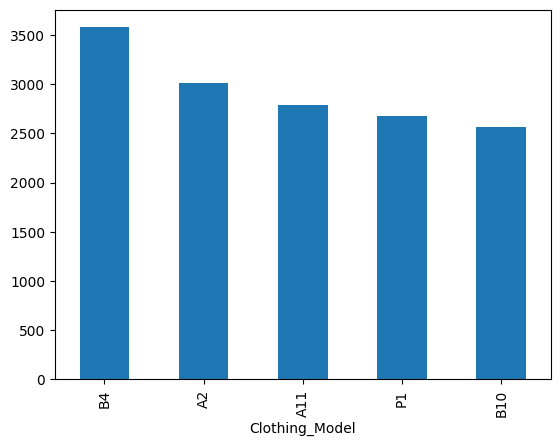

In [10]:
df1.groupby('Clothing_Model')['Clothing_Model'].count().nlargest(5).plot(kind='bar')

#Which Country Contribute Most Clicks

<Axes: xlabel='country'>

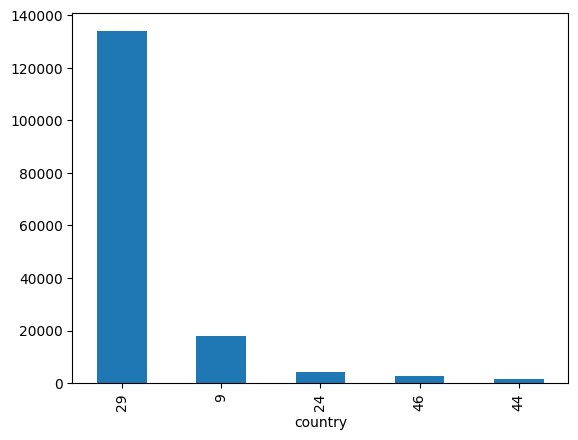

In [11]:
#No of Countries
df['country'].nunique()
df.groupby('country')['country'].count().sort_values(ascending=False).head(5).plot(kind='bar')


#Which Page Contributing Most Clicks

<Axes: xlabel='page'>

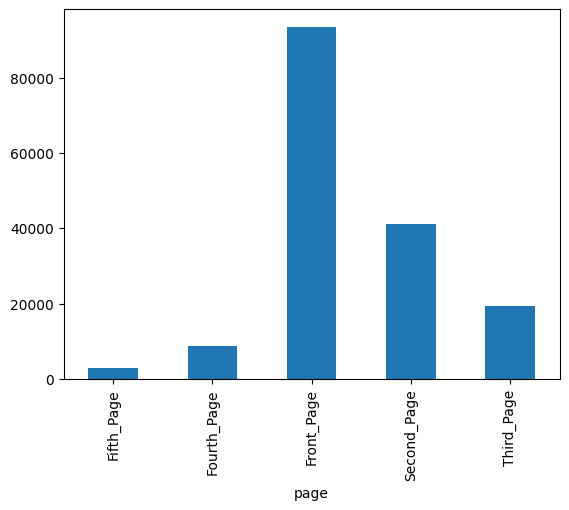

In [12]:
replacement_mapping_pages= {
    1: "Front_Page",
    2: "Second_Page",
    3: "Third_Page",
    4: "Fourth_Page",
    5: "Fifth_Page"
}
df1['page'] = df1['page'].replace(replacement_mapping_pages)
df1['page'].groupby(df1['page']).count().plot(kind='bar')
#Front Pages is showing The Most Clicks

In [13]:
df.dtypes

,0
order,int64
country,int64
Session_ID,int64
Product_Category,int64
Clothing_Model,object
colour,int64
Pic_location,int64
Model_photography,int64
price,int64
Price_ab_avg,int64


#Label encoding on Clothing_Model

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Clothing_Model'] = le.fit_transform(df['Clothing_Model'])
le_clothing_model_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_clothing_model_mapping)

{'A1': 0, 'A10': 1, 'A11': 2, 'A12': 3, 'A13': 4, 'A14': 5, 'A15': 6, 'A16': 7, 'A17': 8, 'A18': 9, 'A19': 10, 'A2': 11, 'A20': 12, 'A21': 13, 'A22': 14, 'A23': 15, 'A24': 16, 'A25': 17, 'A26': 18, 'A27': 19, 'A28': 20, 'A29': 21, 'A3': 22, 'A30': 23, 'A31': 24, 'A32': 25, 'A33': 26, 'A34': 27, 'A35': 28, 'A36': 29, 'A37': 30, 'A38': 31, 'A39': 32, 'A4': 33, 'A40': 34, 'A41': 35, 'A42': 36, 'A43': 37, 'A5': 38, 'A6': 39, 'A7': 40, 'A8': 41, 'A9': 42, 'B1': 43, 'B10': 44, 'B11': 45, 'B12': 46, 'B13': 47, 'B14': 48, 'B15': 49, 'B16': 50, 'B17': 51, 'B19': 52, 'B2': 53, 'B20': 54, 'B21': 55, 'B22': 56, 'B23': 57, 'B24': 58, 'B25': 59, 'B26': 60, 'B27': 61, 'B28': 62, 'B29': 63, 'B3': 64, 'B30': 65, 'B31': 66, 'B32': 67, 'B33': 68, 'B34': 69, 'B4': 70, 'B5': 71, 'B6': 72, 'B7': 73, 'B8': 74, 'B9': 75, 'C1': 76, 'C10': 77, 'C11': 78, 'C12': 79, 'C13': 80, 'C14': 81, 'C15': 82, 'C16': 83, 'C17': 84, 'C18': 85, 'C19': 86, 'C2': 87, 'C20': 88, 'C21': 89, 'C22': 90, 'C23': 91, 'C24': 92, 'C25':

In [15]:
df.loc[:,['price']].describe()

,price
count,165474.000000
mean,43.802507
std,12.548131
min,18.000000
25%,33.000000
50%,43.000000
75%,52.000000
max,82.000000


In [16]:
df.shape

(165474, 11)

#Handling Outlier

In [17]:
cont_var = ['price']  # Define cont_var as a list

def handle_outliers(df, cont_var):
    cont_var = cont_var[0]  # Extract the variable name from the list
    Q1 = df[cont_var].quantile(0.25)
    Q3 = df[cont_var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[cont_var] >= lower_bound) & (df[cont_var] <= upper_bound)]
    return df_filtered

df = handle_outliers(df, cont_var)

In [18]:
df.shape

(163551, 11)

# standardize features

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[cont_var])

df_scaled = pd.DataFrame(scaled_data, columns=cont_var)

# Optionally, replace original columns in 'df' with scaled ones
df[cont_var] = df_scaled

In [20]:
df.head()

,order,country,Session_ID,Product_Category,Clothing_Model,colour,Pic_location,Model_photography,price,Price_ab_avg,page
0,1,29,1,1,4,1,5,1,-1.288659,2,1
1,2,29,1,1,7,1,6,1,-0.868993,2,1
2,3,29,1,2,70,10,2,1,0.725738,1,1
3,4,29,1,2,51,6,6,2,-0.449327,2,1
4,5,29,1,2,74,4,3,2,0.725738,1,1


#User-session-level data

In [21]:
session_data = df.groupby('Session_ID').agg({
    'Product_Category': lambda x: x.mode().iloc[0],
    'Clothing_Model': lambda x: x.mode().iloc[0],
    'page': lambda x: x.mode().iloc[0],
    'order': lambda x: x.mode().iloc[0],
    'Pic_location': lambda x: x.mode().iloc[0],
    'Model_photography': lambda x: x.mode().iloc[0],
    'price': 'mean'})

In [22]:
session_data.head()

,Product_Category,Clothing_Model,page,order,Pic_location,Model_photography,price
Session_ID,,,,,,,
1,2,4,1,1,1,2,-0.104268
2,2,1,2,1,1,1,0.557871
3,3,51,1,1,2,1,-0.099605
4,1,27,2,1,1,1,0.159189
5,3,89,2,1,1,1,1.145404


#Customer Segmentation Based on Session Average Clicks
Using K-means

In [23]:
session_data.isnull().sum()
session_data.dropna(inplace=True)

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
mykmeans = KMeans(n_clusters = 5,random_state=7,n_init='auto')
mykmeans.fit(session_data)
y_kmeans = mykmeans.predict(session_data)

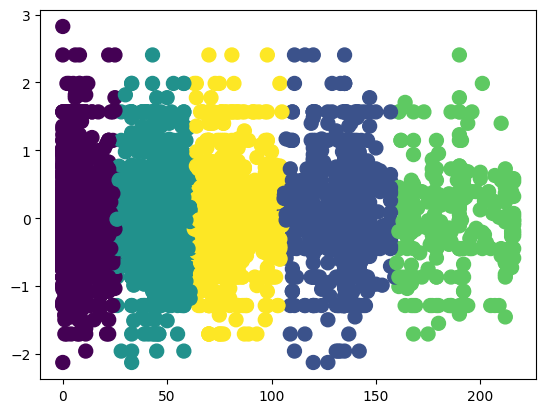

In [26]:
session_data=session_data.iloc[:5000]
y_kmeans=y_kmeans[:5000]
plt.scatter(session_data.loc[:,'Clothing_Model'], session_data.loc[:,'price'], c=y_kmeans, s=100, cmap='viridis')

In [28]:
#Identifying Cluster Size
inertia_values = []
for k in range(2,11):
    mykmeans = KMeans(k,random_state=7,n_init='auto')
    mykmeans.fit(session_data)
    inertia_values.append(mykmeans.inertia_)

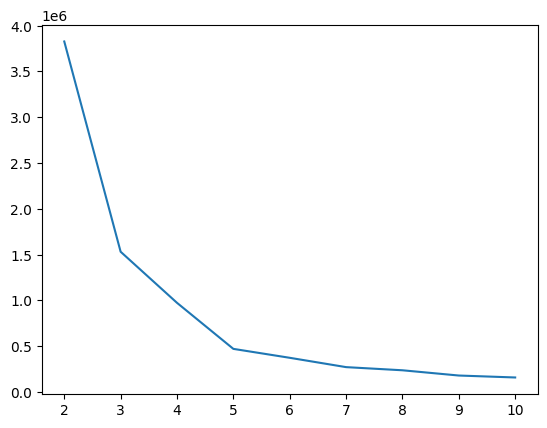

In [29]:
import matplotlib.pyplot as plt
plt.plot(list(range(2,11)), inertia_values)

#Pattern Detection - Sequence Of clicks in a different Session

In [30]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5953 sha256=2ca3e4fc9708b32469c3320dde574e5dbf2b9f32ea98d1327c305f78aaa37fce
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [31]:
from apyori import apriori
# Assuming 'df' is your DataFrame and you want to find associations between clothing models viewed in a session
transactions = df.iloc[:40,:].groupby('Session_ID')['order'].apply(list).values.tolist()

# # Apply the Apriori algorithm
count=0
rules = apriori(transactions, min_support=0.01, min_confidence=0.2, min_lift=3, min_length=4)
for item in list(rules):
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " , items[0] , " -> " ,items[1])
    count+=1
    if count==10:
      break

Rule:  8  ->  7
Rule:  9  ->  7
Rule:  10  ->  7
Rule:  8  ->  9
Rule:  8  ->  10
Rule:  9  ->  10
Rule:  8  ->  1
Rule:  1  ->  9
Rule:  1  ->  10
Rule:  8  ->  1


#Category Co-occurrence -Examine the co-occurrence of product categories within sessions

In [32]:
co_occurrence=df.iloc[:,:].groupby('Session_ID')['Product_Category'].apply(set)

In [33]:
co_occurrence[0:5]

,Product_Category
Session_ID,
1,"{1, 2, 3, 4}"
2,"{1, 2, 4}"
3,"{2, 3, 4}"
4,"{1, 3}"
5,{3}


#Training and Testing data

#Collaborative Filtering

In [34]:
df.head()

,order,country,Session_ID,Product_Category,Clothing_Model,colour,Pic_location,Model_photography,price,Price_ab_avg,page
0,1,29,1,1,4,1,5,1,-1.288659,2,1
1,2,29,1,1,7,1,6,1,-0.868993,2,1
2,3,29,1,2,70,10,2,1,0.725738,1,1
3,4,29,1,2,51,6,6,2,-0.449327,2,1
4,5,29,1,2,74,4,3,2,0.725738,1,1


In [35]:
df.describe()

,order,country,Session_ID,Product_Category,Clothing_Model,colour,Pic_location,Model_photography,price,Price_ab_avg,page
count,163551.000000,163551.000000,163551.000000,163551.000000,163551.000000,163551.000000,163551.000000,163551.000000,161649.000000,163551.000000,163551.000000
mean,9.841297,26.973904,12051.293083,2.417313,83.221992,6.265605,3.261233,1.263129,-0.000448,1.493907,1.718516
std,13.512521,7.123642,7006.042423,1.140943,59.296509,4.245865,1.723018,0.440333,0.999905,0.499964,0.985130
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-2.127991,1.000000,1.000000
25%,2.000000,29.000000,5927.000000,1.000000,38.000000,3.000000,2.000000,1.000000,-0.868993,1.000000,1.000000
50%,6.000000,29.000000,11958.000000,2.000000,70.000000,5.000000,3.000000,1.000000,-0.029661,1.000000,1.000000
75%,12.000000,29.000000,18211.000000,3.000000,132.000000,9.000000,5.000000,2.000000,0.725738,2.000000,2.000000
max,195.000000,47.000000,24026.000000,4.000000,216.000000,14.000000,6.000000,2.000000,2.824068,2.000000,5.000000


In [36]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 934.1 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357289 sha256=5adc595ae03b4fefad1a4988e5cecaafb99b50fe455f4c22dab010232a6f193d
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [37]:
df[['Session_ID', 'Clothing_Model', 'Product_Category']]

,Session_ID,Clothing_Model,Product_Category
0,1,4,1
1,1,7,1
2,1,70,2
3,1,51,2
4,1,74,2
...,...,...,...
165469,24024,44,2
165470,24025,2,1
165471,24026,11,1
165472,24026,87,3


#User Based

In [38]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
df=df.iloc[:100000,:]
reader = Reader(rating_scale=(1, 4))
data = Dataset.load_from_df(df[['Session_ID', 'Clothing_Model', 'Product_Category']], reader)

trainset, testset = train_test_split(data, test_size=0.25)

sim_options = {
    'name': 'cosine',
    'user_based': True
}

algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

predictions = algo.test(testset)

# Calculate RMSE
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse:.4f}')

# Calculate MSE
mse = accuracy.mse(predictions)
print(f'MSE: {mse:.4f}')


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.2284
RMSE: 0.2284
MSE: 0.0522
MSE: 0.0522


In [39]:
# predictions
#  Prediction(uid=12664, iid=7, r_ui=1.0, est=2.7222222222222223, details={'actual_k': 18, 'was_impossible': False}),
#  Prediction(uid=9657, iid=174, r_ui=4.0, est=3.6451612903225805, details={'actual_k': 31, 'was_impossible': False}),
#  Prediction(uid=11013, iid=125, r_ui=3.0, est=2.8666666666666667, details={'actual_k': 15, 'was_impossible': False}),

In [40]:
# Verify from original data
df.loc[(df['Session_ID'] == 12664) & (df['Clothing_Model'] == 7) , :]

,order,country,Session_ID,Product_Category,Clothing_Model,colour,Pic_location,Model_photography,price,Price_ab_avg,page
86903,10,29,12664,1,7,1,6,1,1.56507,2,1


In [41]:
# Verify from original data
df.loc[(df['Session_ID'] == 9657) & (df['Clothing_Model'] == 174) , :]

,order,country,Session_ID,Product_Category,Clothing_Model,colour,Pic_location,Model_photography,price,Price_ab_avg,page
67055,33,29,9657,4,174,9,3,1,1.56507,2,3


In [42]:
# Verify from original data
df.loc[(df['Session_ID'] == 11013) & (df['Clothing_Model'] == 125) , :]

,order,country,Session_ID,Product_Category,Clothing_Model,colour,Pic_location,Model_photography,price,Price_ab_avg,page
76373,12,29,11013,3,125,14,6,1,-0.868993,1,3


#Item Based

In [43]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy


reader = Reader(rating_scale=(1, 4))
data = Dataset.load_from_df(df[['Session_ID', 'Clothing_Model', 'Product_Category']], reader)

trainset, testset = train_test_split(data, test_size=0.25)

sim_options = {
    'name': 'cosine',
    'user_based': False
}

algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)

# Calculate RMSE
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse:.4f}')

# Calculate MSE
mse = accuracy.mse(predictions)
print(f'MSE: {mse:.4f}')


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9749
RMSE: 0.9749
MSE: 0.9504
MSE: 0.9504


In [44]:
# predictions
#  Prediction(uid=5879, iid=120, r_ui=3.0, est=2.3900133333333335, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
#  Prediction(uid=3752, iid=161, r_ui=4.0, est=2.5, details={'actual_k': 8, 'was_impossible': False}),

In [45]:
# Verify from original data
df.loc[(df['Session_ID'] == 5879) & (df['Clothing_Model'] == 120) , :]

,order,country,Session_ID,Product_Category,Clothing_Model,colour,Pic_location,Model_photography,price,Price_ab_avg,page
41111,1,29,5879,3,120,11,2,1,-1.288659,1,1


In [46]:
# Verify from original data
df.loc[(df['Session_ID'] == 3752) & (df['Clothing_Model'] == 161) , :]

,order,country,Session_ID,Product_Category,Clothing_Model,colour,Pic_location,Model_photography,price,Price_ab_avg,page
25836,8,29,3752,4,161,9,5,1,-0.449327,1,2


In [47]:
from collections import defaultdict
def precision_at_k(predictions, k=10, threshold=4.0):
    # Map the predictions to each user
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = []
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items in top-K
        relevant_items = sum((true_r >= threshold) for _, true_r in user_ratings[:k])

        # Total recommended items in top-K
        total_recommended_items = k

        # Precision@K: Proportion of recommended items that are relevant
        precision = relevant_items / total_recommended_items
        precisions.append(precision)

    # Average precision
    return sum(precisions) / len(precisions) if precisions else 0

# Calculate Precision at K=10
precision = precision_at_k(predictions, k=3, threshold=1.0)
print(f'Precision at K=3: {precision:.4f}')

Precision at K=3: 0.6348
